In [ ]:
import yaeos
from yaeos import PengRobinson76, QMR
import numpy as np

In [ ]:
# Number of components, for easier definition
nc = 2

# kij and lij matrices
k12 = 0.1
lij = kij = np.zeros((nc,nc))
kij[0,1] = kij[1,0] = k12

mixrule = QMR(kij, lij)

# Critical constants
Tc = [320, 375]
Pc = [30, 45]
w = [0.0123, 0.045]

model = PengRobinson76(Tc, Pc, w, mixrule)
n = [1.0, 0.2]

model.fugacity(n, v=2.0, t=303.15, dn=True)

In [ ]:
n = [0.4, 0.6]
Tc = [190.564, 425.12]
Pc = [45.99, 37.96]
w = [0.0115478, 0.200164]

lij = kij = np.zeros((nc,nc))
mixrule = QMR(kij, lij)
model = PengRobinson76(Tc, Pc, w, mixrule)

In [ ]:
%%time
P, T = 60.0, 294.0

ts = np.linspace(200, 400, 50)
ps = np.linspace(30, 100, 50)
betas = []

t = []
p = []

for T in ts:
    for P in ps:
        flash = model.flash_tp(n, T, P)
        x = flash["x"]
        y = flash["y"]
        P = flash["P"]
        T = flash["T"]
        beta = flash["beta"]
        # x, y, P, T, Vx, Vy, beta = yaeos.yaeos_c.flash(id=model.id, z=n, p=P, t=T)
        t.append(T)
        p.append(P)
        betas.append(beta)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(t, p, c=betas)

## Modified Huron-Vidal MixingRule

CPU times: user 5.5 s, sys: 1.07 s, total: 6.57 s
Wall time: 5.45 s


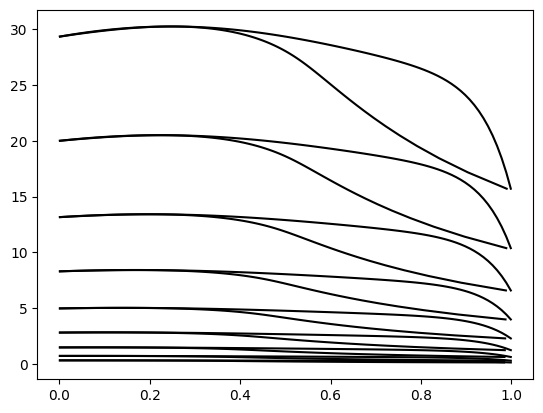

In [ ]:
%%time
from yaeos import NRTL, MHV, PengRobinson76, yaeos_c, QMR
import numpy as np
import matplotlib.pyplot as plt

nc = 2
tc = [647.14, 513.92]
pc = [220.64, 61.48]
w =  [0.344, 0.649]

a = [[0, 3.458], [-0.801, 0]]
b = [[0, -586.1], [246.2, 0]]
c = [[0, 0.3], [0.3, 0]]

b = np.array(b)

ge_model = NRTL(a, b, c)
mixrule = MHV(ge_model, q=-0.53)

null_mixing = QMR(np.zeros((nc,nc)), np.zeros((nc,nc)))

model_stock = PengRobinson76(tc, pc, w, null_mixing)
model_mhv = PengRobinson76(tc, pc, w, mixrule)

colors = ["red", "green", "blue", "orange", "black"]
ts = np.linspace(50+273, 200+273, 9)
import time
for i, T in enumerate(ts):
    i=4
    xs = np.linspace(0.001, 0.999, 100)
    ys = []
    ps = []

    st = time.time()
    
    for x1 in xs:
        x = [x1, 1-x1]
        sat = model_mhv.saturation_pressure(x, T, "bubble")
        p, y = sat["P"], sat["y"]
        ps.append(p)
        ys.append(y[0])

    plt.plot(xs, ps, color=colors[i])
    plt.plot(ys, ps, color=colors[i])

In [ ]:
model_mhv.id, model_stock.id

(2, 1)

In [ ]:
xs = np.linspace(0.001, 0.999, 100)
ys_mhv = []
ps_mhv = []
ys_pr = []
ps_pr = []


T  = 600
for x1 in xs:
        x = [x1, 1-x1]
        sat_mhv = model_mhv.saturation_pressure(x, T, "bubble")
        p, y = sat_mhv["P"], sat_mhv["y"]
        ps_mhv.append(p)
        ys_mhv.append(y[0])
        
        sat_pr = model_stock.saturation_pressure(x, T, "bubble")
        p, y = sat_pr["P"], sat_pr["y"]
        ps_pr.append(p)
        ys_pr.append(y[0])

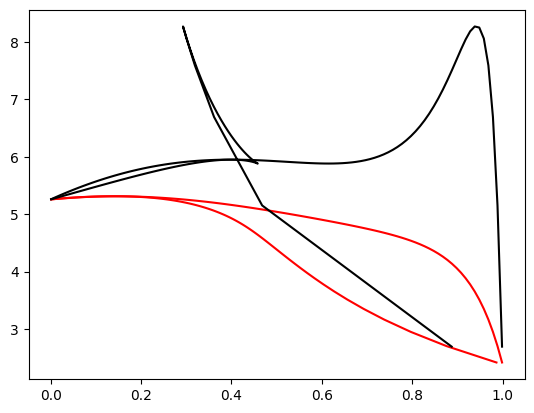

In [ ]:
plt.plot(xs, ps_mhv, color="red")
plt.plot(ys_mhv, ps_mhv, color="red")

plt.plot(xs, ps_pr, color="black")
plt.plot(ys_pr, ps_pr, color="black")

# Phase envelope tracing

In [ ]:
import yaeos
import matplotlib.pyplot as plt
import numpy as np

           1
   200.00000000000000        0.0000000000000000     
   3.4532662131729399     


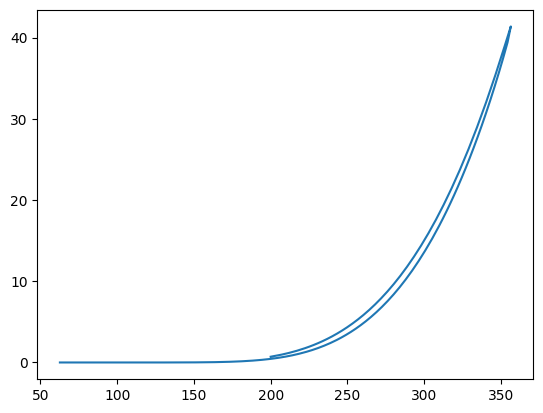

In [ ]:
# Number of components, for easier definition
nc = 2

# kij and lij matrices
k12 = 0.1
lij = kij = np.zeros((nc,nc))
kij[0,1] = kij[1,0] = k12

mixrule = yaeos.QMR(kij, lij)

# Critical constants
Tc = [320, 375]
Pc = [30, 45]
w = [0.0123, 0.045]

model = yaeos.PengRobinson76(Tc, Pc, w, mixrule)

z = [0.3, 0.7]

T, P = yaeos.yaeos_c.pt2_phase_envelope(model.id, z, kind="bubble", t0=200.)

plt.plot(T, P)

In [ ]:

z = [0.7, 0.3]

T, P = yaeos.yaeos_c.pt2_phase_envelope(model.id, z, kind="dew", p0=1)
plt.plot(T, P)

T, P = yaeos.yaeos_c.pt2_phase_envelope(model.id, z, kind="dew", p0=5)
plt.plot(T, P)


: 

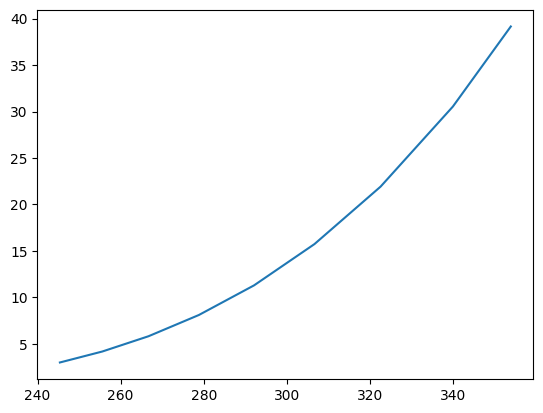